In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data['species_class']= np.where(data.Species=='Iris-virginica',1,np.where(data.Species=='Iris-versicolor',2,3))

In [10]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'species_class'],
      dtype='object')

In [12]:
cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [13]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y=train_test_split(data[cols],data['species_class'],test_size=0.2,random_state=123)

In [16]:
param_grid={'max_depth': np.arange(2,8),'max_features': np.arange(2,5)}

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,verbose=1,n_jobs=-1)
tree.fit(train_x,train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [23]:
tree.best_score_

0.95

In [25]:
tree.best_params_

{'max_depth': 6, 'max_features': 3}

In [30]:
train_pred = tree.predict(train_x)
test_pred = tree.predict(test_x)

In [31]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [32]:
clf_tree=DecisionTreeClassifier(max_depth = 4, max_features=2)
clf_tree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4, max_features=2)

In [35]:
tree_test_pred = pd.DataFrame({'actual':test_y,'predicted': clf_tree.predict(test_x)})

In [36]:
metrics.accuracy_score(tree_test_pred.actual,tree_test_pred.predicted)

1.0

Text(0.5, 23.52222222222222, 'Predicted label')

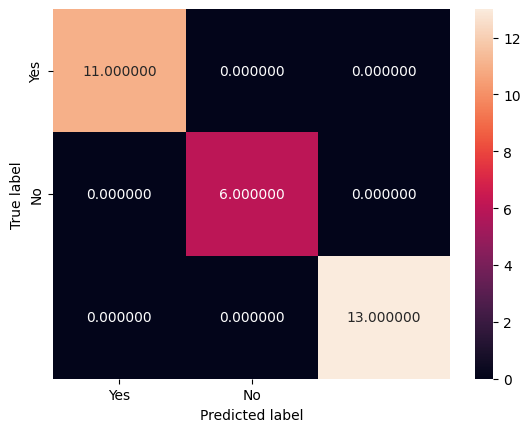

In [38]:
tree_cm=metrics.confusion_matrix(tree_test_pred.predicted,tree_test_pred.actual)
sns.heatmap(tree_cm,annot=True,fmt='2f',xticklabels=["Yes","No"],yticklabels=["Yes","No"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

TypeError: cannot unpack non-iterable bool object

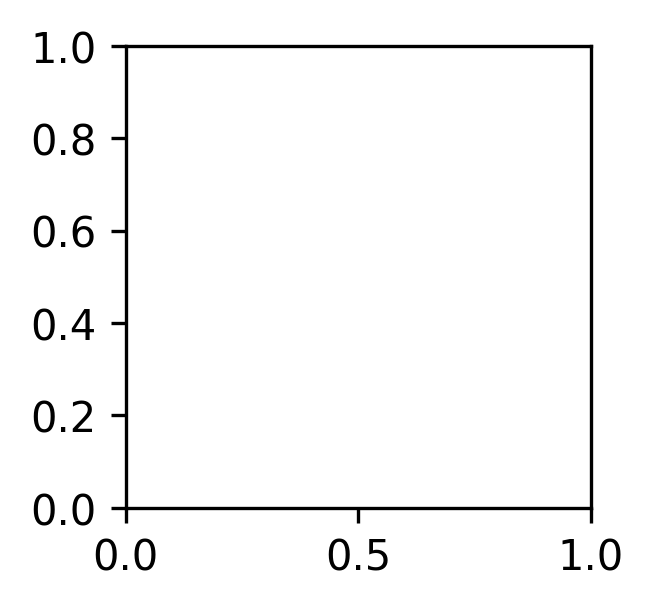

In [45]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree=clf_tree,feature_names = fn, class_names=cn,filled = True